In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

(87, 65)


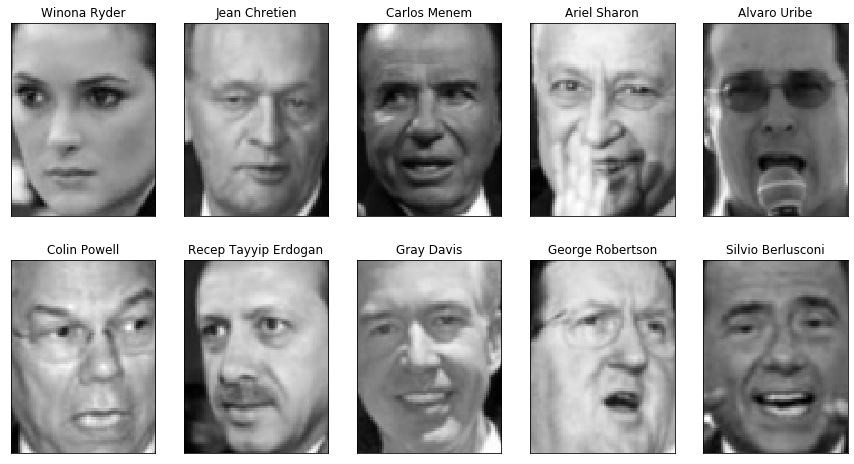

In [2]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape
print(image_shape)
fig, axes = plt.subplots(2, 5,figsize = (15,8), subplot_kw = {'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])

In [3]:
print("people.images.shape: {}" .format(people.images.shape))
print("Number of classes: {}" .format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [4]:
#count how often each target appears
counts = np.bincount(people.target)
#print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}" .format(name, count), end=' ')
    if (i+1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [5]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

#scale the grayscale values to be between 0 and 1
#instead of 0 and 255 for better numeric stability
X_people = X_people / 255

In [6]:
X_people_stand = (X_people - np.mean(X_people, axis = 0))/ np.std(X_people, axis = 0, ddof = 1)
X_people_stand.shape

(2063, 5655)

In [7]:
#Reduce the data to 100D

U, e, vT = np.linalg.svd(X_people_stand)
W100 = vT.T[:,:100]
X_people_100D = X_people_stand.dot(W100)
X_people_100D.shape, W100.T.shape

((2063, 100), (100, 5655))

In [8]:
centers = []
for c in range(10):
    c = c*200
    centers.append(X_people_100D[c])
centers = np.array(centers)
centers.shape

(10, 100)

In [9]:
def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

In [10]:
labels = []
distance1 = [euclidean_distance(centers[0], x_train) for x_train in X_people_100D]
distance2 = [euclidean_distance(centers[1], x_train) for x_train in X_people_100D]
distance3 = [euclidean_distance(centers[2], x_train) for x_train in X_people_100D]
distance4 = [euclidean_distance(centers[3], x_train) for x_train in X_people_100D]
distance5 = [euclidean_distance(centers[4], x_train) for x_train in X_people_100D]
distance6 = [euclidean_distance(centers[5], x_train) for x_train in X_people_100D]
distance7 = [euclidean_distance(centers[6], x_train) for x_train in X_people_100D]
distance8 = [euclidean_distance(centers[7], x_train) for x_train in X_people_100D]
distance9 = [euclidean_distance(centers[8], x_train) for x_train in X_people_100D]
distance10 = [euclidean_distance(centers[9], x_train) for x_train in X_people_100D]
distance1, distance2, distance3, distance4, distance5, distance6, distance7, distance8, distance9, distance10,  = np.array(distance1), np.array(distance2), np.array(distance3), np.array(distance4), np.array(distance5), np.array(distance6), np.array(distance7), np.array(distance8), np.array(distance9), np.array(distance10)
distance = np.c_[distance1, distance2, distance3, distance4, distance5, distance6, distance7, distance8, distance9, distance10]
for i in range(distance.shape[0]):
    a = np.argmin(distance[i])
    labels.append(a)
labels = np.array(labels)
sorted_labels = np.sort(labels)
print(np.bincount(sorted_labels))
print(np.bincount(labels))
print(labels.shape)
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = [], [], [], [], [], [], [], [], [], []
for i in range(labels.shape[0]):
    if (labels[i] == 0):
        c1.append(X_people_100D[i])
    elif (labels[i] == 1):
        c2.append(X_people_100D[i])
    elif (labels[i] == 2):
        c3.append(X_people_100D[i])
    elif (labels[i] == 3):
        c4.append(X_people_100D[i])
    elif (labels[i] == 4):
        c5.append(X_people_100D[i])
    elif (labels[i] == 5):
        c6.append(X_people_100D[i])
    elif (labels[i] == 6):
        c7.append(X_people_100D[i])
    elif (labels[i] == 7):
        c8.append(X_people_100D[i])
    elif (labels[i] == 8):
        c9.append(X_people_100D[i])
    elif (labels[i] == 9):
        c10.append(X_people_100D[i])
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)
c5 = np.array(c5)
c6 = np.array(c6)
c7 = np.array(c7)
c8 = np.array(c8)
c9 = np.array(c9)
c10 = np.array(c10)
print(c1.shape, c2.shape, c3.shape, c4.shape)

[179 211 143  92 224  75 739  10 281 109]
[179 211 143  92 224  75 739  10 281 109]
(2063,)
(179, 100) (211, 100) (143, 100) (92, 100)


In [11]:
centers_new = []
c1_mean = np.mean(c1, axis = 0)
c2_mean = np.mean(c2, axis = 0)
c3_mean = np.mean(c3, axis = 0)
c4_mean = np.mean(c4, axis = 0)
c5_mean = np.mean(c5, axis = 0)
c6_mean = np.mean(c6, axis = 0)
c7_mean = np.mean(c7, axis = 0)
c8_mean = np.mean(c8, axis = 0)
c9_mean = np.mean(c9, axis = 0)
c10_mean = np.mean(c10, axis = 0)
centers_new.append(c1_mean)
centers_new.append(c2_mean)
centers_new.append(c3_mean)
centers_new.append(c4_mean)
centers_new.append(c5_mean)
centers_new.append(c6_mean)
centers_new.append(c7_mean)
centers_new.append(c8_mean)
centers_new.append(c9_mean)
centers_new.append(c10_mean)
centers_new = np.array(centers_new)
centers_new.shape
centers_reconstruct = centers_new @ W100.T
centers_reconstruct.shape

(10, 5655)

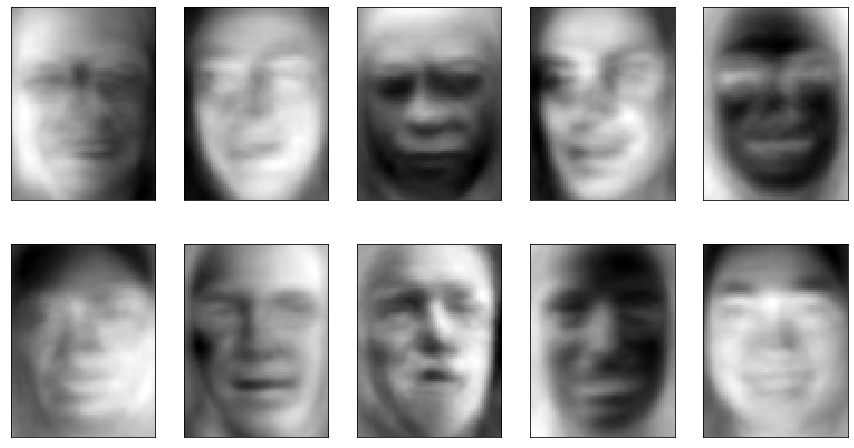

In [12]:
fig, axes = plt.subplots(2, 5,figsize = (15,8), subplot_kw = {'xticks': (), 'yticks': ()})
for image, ax in zip(centers_reconstruct, axes.ravel()):
    ax.imshow(image.reshape(87, 65), cmap=cm.gray)

In [23]:
distance1 = [euclidean_distance(centers_new[0], x_train) for x_train in X_people_100D]
distance2 = [euclidean_distance(centers_new[1], x_train) for x_train in X_people_100D]
distance3 = [euclidean_distance(centers_new[2], x_train) for x_train in X_people_100D]
distance4 = [euclidean_distance(centers_new[3], x_train) for x_train in X_people_100D]
distance5 = [euclidean_distance(centers_new[4], x_train) for x_train in X_people_100D]
distance6 = [euclidean_distance(centers_new[5], x_train) for x_train in X_people_100D]
distance7 = [euclidean_distance(centers_new[6], x_train) for x_train in X_people_100D]
distance8 = [euclidean_distance(centers_new[7], x_train) for x_train in X_people_100D]
distance9 = [euclidean_distance(centers_new[8], x_train) for x_train in X_people_100D]
distance10 = [euclidean_distance(centers_new[9], x_train) for x_train in X_people_100D]
distance1, distance2, distance3, distance4, distance5, distance6, distance7, distance8, distance9, distance10  = np.array(distance1), np.array(distance2), np.array(distance3), np.array(distance4), np.array(distance5), np.array(distance6), np.array(distance7), np.array(distance8), np.array(distance9), np.array(distance10)
print(distance1, distance2, distance3, distance4, distance5, distance6, distance7, distance8, distance9, distance10)

[ 50.16077   61.093853 123.3112   ...  80.82449  119.4018    70.91978 ] [ 73.27849   89.393814 137.30762  ...  79.12139   82.44462   73.8816  ] [ 76.44498   62.528183  68.05576  ...  92.092606 120.484344 117.156715] [ 64.50364   73.682884 108.15222  ...  73.15104   84.61863   87.14919 ] [ 87.23015   78.380844  69.31138  ... 111.060776 132.39285  134.05916 ] [ 95.06165   98.303925  84.5983   ... 113.504585  99.80295  138.08813 ] [ 65.05311   69.71207   92.11249  ...  84.94095   96.70093  100.234535] [ 86.7825   92.03137 100.3586  ...  95.28233 102.82313 109.95842] [ 87.17911  79.95115  73.65686 ... 118.68622 140.61131 137.95093] [ 68.75034   67.762184 104.38633  ...  86.886734  97.82126   96.754585]


In [28]:
max_d1, min_d1 = max(distance1), min(distance1)
max_d2, min_d2 = max(distance2), min(distance2)
max_d3, min_d3 = max(distance3), min(distance3)
max_d4, min_d4 = max(distance4), min(distance4)
max_d5, min_d5 = max(distance5), min(distance5)
max_d6, min_d6 = max(distance6), min(distance6)
max_d7, min_d7 = max(distance7), min(distance7)
max_d8, min_d8 = max(distance8), min(distance8)
max_d9, min_d9 = max(distance9), min(distance9)
max_d10, min_d10 = max(distance10), min(distance10)
index_max_d1, index_min_d1 = np.where(distance1 == max_d1), np.where(distance1 == min_d1)
index_max_d2, index_min_d2 = np.where(distance2 == max_d2), np.where(distance2 == min_d2)
index_max_d3, index_min_d3 = np.where(distance3 == max_d3), np.where(distance3 == min_d3)
index_max_d4, index_min_d4 = np.where(distance4 == max_d4), np.where(distance4 == min_d4)
index_max_d5, index_min_d5 = np.where(distance5 == max_d5), np.where(distance5 == min_d5)
index_max_d6, index_min_d6 = np.where(distance6 == max_d6), np.where(distance6 == min_d6)
index_max_d7, index_min_d7 = np.where(distance7 == max_d7), np.where(distance7 == min_d7)
index_max_d8, index_min_d8 = np.where(distance8 == max_d8), np.where(distance8 == min_d8)
index_max_d9, index_min_d9 = np.where(distance9 == max_d9), np.where(distance9 == min_d9)
index_max_d10, index_min_d10 = np.where(distance10 == max_d10), np.where(distance10 == min_d10)
index_max_d1

(array([1242]),)

In [25]:
image_furthest = np.array(X_people_100D[index_max_d1])
image_furthest = np.append(image_furthest, X_people_100D[index_max_d2], axis = 0)
image_furthest = np.append(image_furthest, X_people_100D[index_max_d3], axis = 0)
image_furthest = np.append(image_furthest, X_people_100D[index_max_d4], axis = 0)
image_furthest = np.append(image_furthest, X_people_100D[index_max_d5], axis = 0)
image_furthest = np.append(image_furthest, X_people_100D[index_max_d6], axis = 0)
image_furthest = np.append(image_furthest, X_people_100D[index_max_d7], axis = 0)
image_furthest = np.append(image_furthest, X_people_100D[index_max_d8], axis = 0)
image_furthest = np.append(image_furthest, X_people_100D[index_max_d9], axis = 0)
image_furthest = np.append(image_furthest, X_people_100D[index_max_d10], axis = 0)
image_furthest.shape

(10, 100)

In [17]:
image_closest = np.array(X_people_100D[index_max_d1])
image_closest = np.append(image_closest, X_people_100D[index_min_d2], axis = 0)
image_closest = np.append(image_closest, X_people_100D[index_min_d3], axis = 0)
image_closest = np.append(image_closest, X_people_100D[index_min_d4], axis = 0)
image_closest = np.append(image_closest, X_people_100D[index_min_d5], axis = 0)
image_closest = np.append(image_closest, X_people_100D[index_min_d6], axis = 0)
image_closest = np.append(image_closest, X_people_100D[index_min_d7], axis = 0)
image_closest = np.append(image_closest, X_people_100D[index_min_d8], axis = 0)
image_closest = np.append(image_closest, X_people_100D[index_min_d9], axis = 0)
image_closest = np.append(image_closest, X_people_100D[index_min_d10], axis = 0)
image_closest.shape

(10, 100)

In [18]:
image_furthest_reconstruct = image_furthest @ W100.T
image_furthest_reconstruct.shape

(10, 5655)

In [19]:
image_closest_reconstruct = image_closest @ W100.T
image_closest_reconstruct.shape

(10, 5655)

#Reconstructed Images closest to cluster centers in order

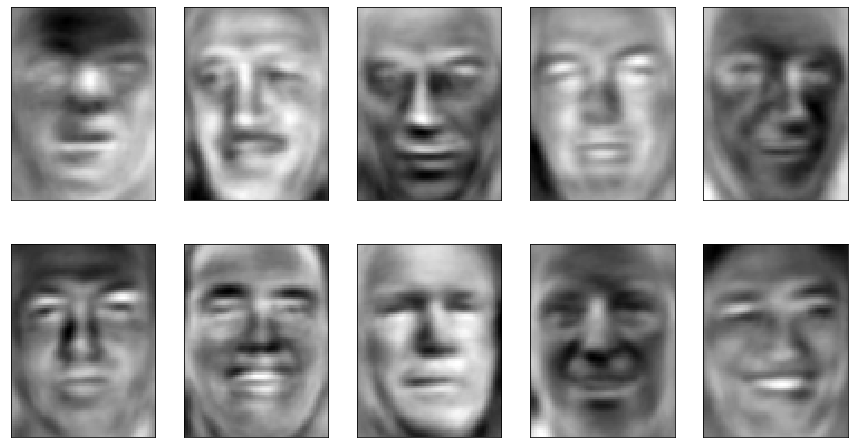

In [20]:
fig, axes = plt.subplots(2, 5,figsize = (15,8), subplot_kw = {'xticks': (), 'yticks': ()})
for image, ax in zip(image_closest_reconstruct, axes.ravel()):
    ax.imshow(image.reshape(87, 65), cmap=cm.gray)

#Reconstructed images furthest to cluster centers in order

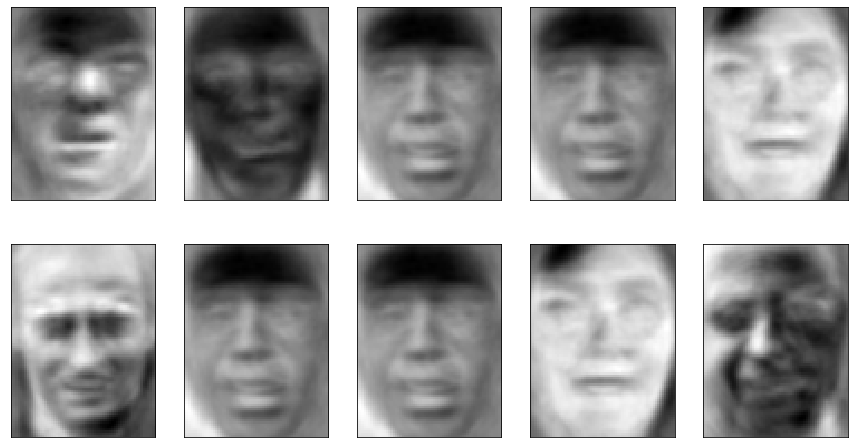

In [21]:
fig, axes = plt.subplots(2, 5,figsize = (15,8), subplot_kw = {'xticks': (), 'yticks': ()})
for image, ax in zip(image_furthest_reconstruct, axes.ravel()):
    ax.imshow(image.reshape(87, 65), cmap=cm.gray)

In [30]:
image_furthest_originalSpace = np.array(X_people[index_max_d1])
image_furthest_originalSpace = np.append(image_furthest_originalSpace, X_people[index_max_d2], axis = 0)
image_furthest_originalSpace = np.append(image_furthest_originalSpace, X_people[index_max_d3], axis = 0)
image_furthest_originalSpace = np.append(image_furthest_originalSpace, X_people[index_max_d4], axis = 0)
image_furthest_originalSpace = np.append(image_furthest_originalSpace, X_people[index_max_d5], axis = 0)
image_furthest_originalSpace = np.append(image_furthest_originalSpace, X_people[index_max_d6], axis = 0)
image_furthest_originalSpace = np.append(image_furthest_originalSpace, X_people[index_max_d7], axis = 0)
image_furthest_originalSpace = np.append(image_furthest_originalSpace, X_people[index_max_d8], axis = 0)
image_furthest_originalSpace = np.append(image_furthest_originalSpace, X_people[index_max_d9], axis = 0)
image_furthest_originalSpace = np.append(image_furthest_originalSpace, X_people[index_max_d10], axis = 0)
image_furthest_originalSpace.shape

(10, 5655)

In [31]:
image_closest_originalSpace = np.array(X_people[index_max_d1])
image_closest_originalSpace = np.append(image_closest_originalSpace, X_people[index_min_d2], axis = 0)
image_closest_originalSpace = np.append(image_closest_originalSpace, X_people[index_min_d3], axis = 0)
image_closest_originalSpace = np.append(image_closest_originalSpace, X_people[index_min_d4], axis = 0)
image_closest_originalSpace = np.append(image_closest_originalSpace, X_people[index_min_d5], axis = 0)
image_closest_originalSpace = np.append(image_closest_originalSpace, X_people[index_min_d6], axis = 0)
image_closest_originalSpace = np.append(image_closest_originalSpace, X_people[index_min_d7], axis = 0)
image_closest_originalSpace = np.append(image_closest_originalSpace, X_people[index_min_d8], axis = 0)
image_closest_originalSpace = np.append(image_closest_originalSpace, X_people[index_min_d9], axis = 0)
image_closest_originalSpace = np.append(image_closest_originalSpace, X_people[index_min_d10], axis = 0)
image_closest_originalSpace.shape

(10, 5655)

#Images from the original space furthest to cluster centers in order

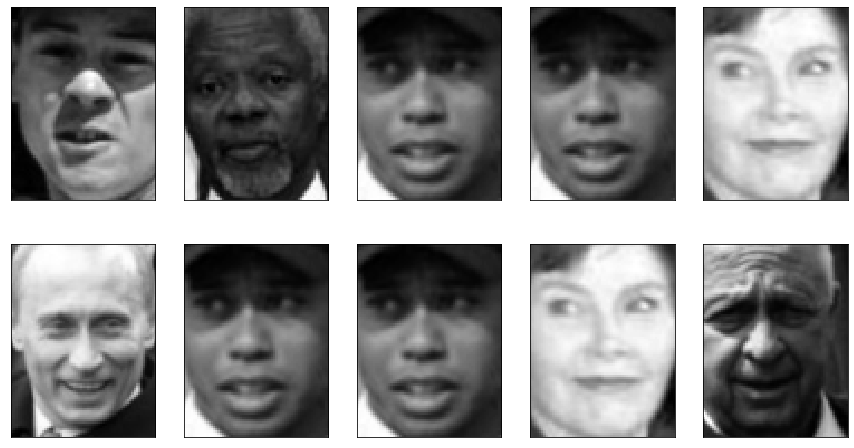

In [32]:
fig, axes = plt.subplots(2, 5,figsize = (15,8), subplot_kw = {'xticks': (), 'yticks': ()})
for image, ax in zip(image_furthest_originalSpace, axes.ravel()):
    ax.imshow(image.reshape(87, 65), cmap=cm.gray)

#Images from the original space closest to cluster centers in order

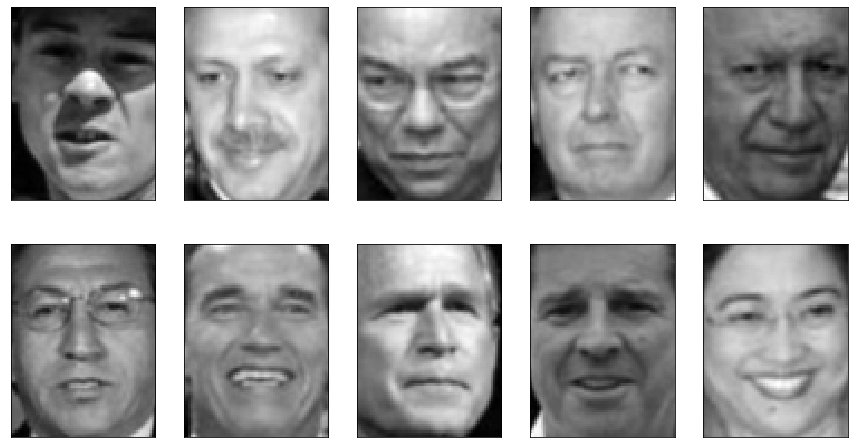

In [33]:
fig, axes = plt.subplots(2, 5,figsize = (15,8), subplot_kw = {'xticks': (), 'yticks': ()})
for image, ax in zip(image_closest_originalSpace, axes.ravel()):
    ax.imshow(image.reshape(87, 65), cmap=cm.gray)